# Análisis de Componentes Principales (PCA)
### Madeleine Yameli Romero Rayas (207549458)

In [1]:
import pandas as pd
from sklearn import datasets

data = datasets.load_iris()
X = data.data
Y = data.target

X = pd.DataFrame(X, columns=data.feature_names)
Y = pd.DataFrame(Y, columns=['target'])

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [3]:
X.isna().sum().sum()

0

In [4]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# PASO 1. Estandarizar los datos

In [5]:
import numpy as np

def standardize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return(X-mean)/std

Estandarizar: Escalar los datos para que tengan media 0 y varianza 1.

# PASO 2. Matriz de covarianza / Correlación

In [6]:
def calculate_covariance_matrix(X):
    return np.cov(X.T)

# PASO 3. Valores y vectore propios

In [7]:
def calculate_eigenvectors_values(X):
    covariance_matrix = calculate_covariance_matrix(X)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

# PASO 4. Componentes Principales

In [8]:
def select_principal_components(eigenvalues, eigenvectors, num_components):
    idx = np.argsort(eigenvalues)[::-1]  #ordena de mayor a menor
    sorted_eigenvectors = eigenvectors[:, idx]
    return sorted_eigenvectors[:, :num_components]

Consideraciones: Genera perdida de información, los componentes principales no son siempre fáciles de interpretar

# PASO 5. Transformación a Nuevas Dimensiones

In [9]:
def transform_data(X, eigenvectors):
    return np.dot(X, eigenvectors)

In [10]:
X_std = standardize_data(X)

In [11]:
eigenvalues, eigenvectors = calculate_eigenvectors_values(X_std)

In [12]:
k = 2
selected_eigenvectors = select_principal_components(eigenvalues, eigenvectors, k)

In [13]:
X_pca = transform_data(X_std, selected_eigenvectors)

# PASO 6. Interpretación de los Resultados

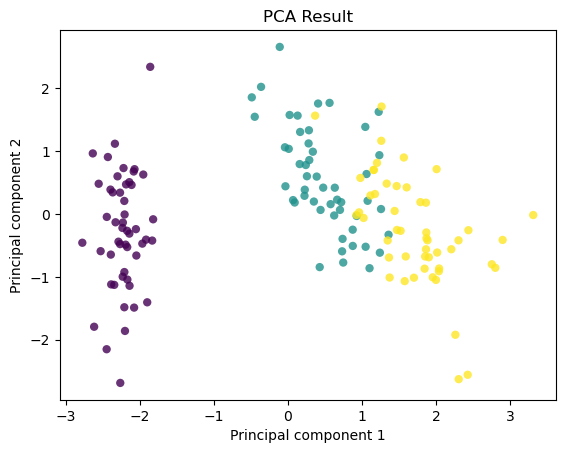

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y['target'], edgecolor="none", alpha=0.8)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA Result')
plt.show()

# Usando la función PCA de sklearn

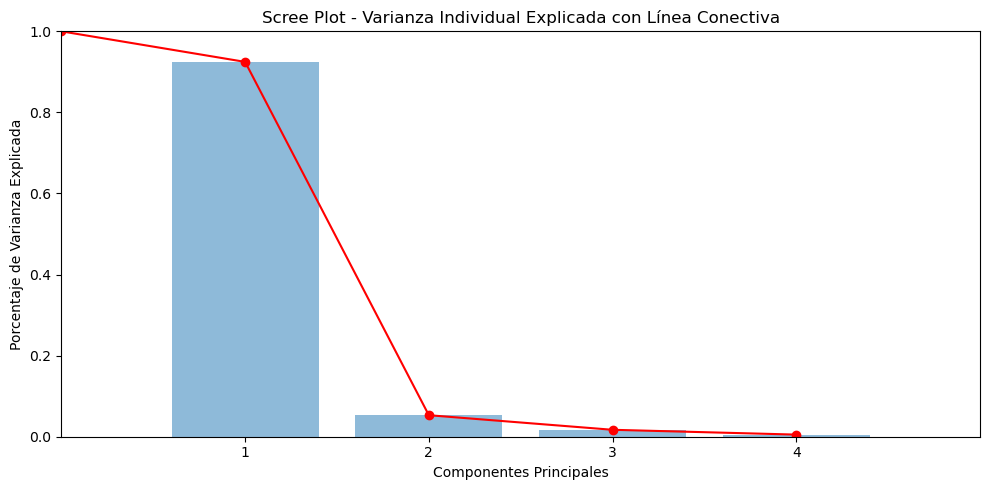

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Supongamos que 'X' es tu conjunto de datos normalizado
# X = np.array([...])

# Realizar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Creación del scree plot con las modificaciones solicitadas
plt.figure(figsize=(10, 5))

# Bar plot para la varianza explicada por cada componente principal
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')

# Línea que conecta los componentes principales, comenzando en (0,1)
plt.plot([0] + list(range(1, len(explained_variance_ratio) + 1)), [1] + list(explained_variance_ratio), marker='o', linestyle='-', color='r')

plt.title('Scree Plot - Varianza Individual Explicada con Línea Conectiva')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.ylim(0, 1)  # Asegurar que el eje Y comience en 0 y termine en 1
plt.xlim(0, len(explained_variance_ratio) + 1)  # Asegurar que el eje X comience en 0
plt.tight_layout()
plt.show()